In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
plt.rcParams['text.usetex'] = True
from IPython.display import display, Math

# Ley de Stokes y viscosidad sobre una esfera en caída libre

Cuando un cuerpo **esférico** cae a través de un **fluido viscoso**, experimenta varias fuerzas: la **gravedad**, el **empuje del fluido** y la **resistencia viscosa**. La Ley de Stokes describe precisamente esta última.

## 1. Fuerzas sobre una esfera en un fluido

Sea una esfera de radio $(R)$ y densidad $(\rho_s)$, cayendo a través de un fluido de densidad $(\rho_f)$ y viscosidad dinámica $(\eta)$.

Las fuerzas principales son:

1. **Peso de la esfera:**
  $$
   F_g = m g = \frac{4}{3}\pi R^3 \rho_s g
   $$

2. **Fuerza de flotación (empuje de Arquímedes):**
   $$
   F_b = \frac{4}{3}\pi R^3 \rho_f g
   $$

3. **Fuerza viscosa según la Ley de Stokes (resistencia al movimiento):**
   $$
   F_d = 6 \pi \eta R v
   $$

donde (v) es la velocidad instantánea de la esfera.
---
## 2. Ley de Stokes

La **Ley de Stokes** establece que la **fuerza viscosa** sobre una **esfera pequeña y rígida** moviéndose lentamente en un fluido viscoso es proporcional a su velocidad:

$$
\boxed{F_d = 6 \pi \eta R v}
$$

Condiciones de validez:
* Número de Reynolds $Re = \frac{\rho_f v R}{\eta} \ll 1$ (flujo laminar)
* Fluido incompresible y newtoniano
* Esfera rígida y lisa
---

## 3. Ecuación de movimiento

Aplicando la **segunda ley de Newton** en la dirección vertical:

$$
m \frac{dv}{dt} = F_g - F_b - F_d
$$

Sustituyendo las fuerzas:

$$
\frac{4}{3}\pi R^3 \rho_s \frac{dv}{dt} = \frac{4}{3}\pi R^3 (\rho_s - \rho_f) g - 6 \pi \eta R v
$$

Dividimos entre $(m = \frac{4}{3}\pi R^3 \rho_s)$:

$$
\frac{dv}{dt} = \frac{\rho_s - \rho_f}{\rho_s} g - \frac{9 \eta}{2 R^2 \rho_s} v
$$

Definiendo:

$$
\tau = \frac{2 R^2 \rho_s}{9 \eta} \quad \Rightarrow \quad \frac{dv}{dt} = g \frac{\rho_s - \rho_f}{\rho_s} - \frac{v}{\tau}
$$

Esta es una **ecuación diferencial lineal de primer orden**.

---

## 4. Velocidad terminal

Cuando la esfera alcanza **velocidad terminal**, la aceleración es cero:

$$
0 = g \frac{\rho_s - \rho_f}{\rho_s} - \frac{v_t}{\tau} \quad \Rightarrow \quad v_t = \tau g \frac{\rho_s - \rho_f}{\rho_s}
$$

Expresando en términos de las constantes originales:

$$
\boxed{v_t = \frac{2 R^2 g (\rho_s - \rho_f)}{9 \eta}}
$$

* Esta es la **velocidad máxima** que la esfera alcanza en un fluido viscoso bajo condiciones laminares.

---

## 5. Solución temporal de la velocidad

La solución de la ecuación diferencial es:

$$
v(t) = v_t \left(1 - e^{-t/\tau}\right)
$$

* Inicialmente a t=0 $\to$ (v(0) = 0)
* Para $(t \gg \tau)$, $v(t) \to v_t$
* Para calcular la trayectoria x(t) integramos v(t)
* La **fuerza de fricción viscosa** crece linealmente con la velocidad: ($F_d \propto v$)
* La esfera **acelera** hasta que la fuerza de fricción equilibra el **peso efectivo** ($(F_g - F_b)$)
* La **velocidad terminal** depende del **radio**, **densidades** y **viscosidad** del fluido
* El tiempo característico para alcanzar $(v_t)$ es $(\tau = \frac{2 R^2 \rho_s}{9 \eta})$

In [4]:
t_data = np.array([0.6,0.63, 0.667,0.700, 0.733,0.766,0.800])-0.6
v_data = np.array([0.00,12.038, 34.455, 65.606, 92.119, 107.23, 117.07])

In [93]:
# Masa = 44.9 gr 
# \rho_agua = 1000 gr/cm^3
# Diametro = 2.01 cm 

In [5]:
def reynolds_number(rho_f, v, R, eta):
    """
    Calcula el número de Reynolds para una esfera en un fluido.
    
    En problemas donde el fluido considerado es el agua, 
    se ha demostrado mediante experimentación en laboratorio
    que entre un número de Reynolds de 2000 a 3000 
    se encuentra la etapa de transición laminar-turbulento
    en el flujo de la capa límite. 
    
    Parámetros:
    ----------
    rho_f : densidad del fluido [g/cm^3 o kg/m^3]
    v     : velocidad de la esfera [cm/s o m/s, consistente con eta]
    R     : radio de la esfera [cm o m]
    eta   : viscosidad dinámica del fluido [g/(cm·s) o Pa·s, consistente con unidades de v y R]
    
    Retorna:
    -------
    Re : Número de Reynolds (adimensional)
    """
    Re = (rho_f * v * 2 * R) / eta  # usando diámetro 2R
    return Re

rho_s= 6699.4283857744695 vt_data (m/s)= 2336.411820958135 tau_data(s) =  238.20189816087003 Viscosidad (gr/cm s) = 0.01
Parámetros ajustados: vt_fit(m/s) = 9.9568 m/s, tau_fit(s) = 1.5161 s Viscosidad_fit=  1.5711017336690922


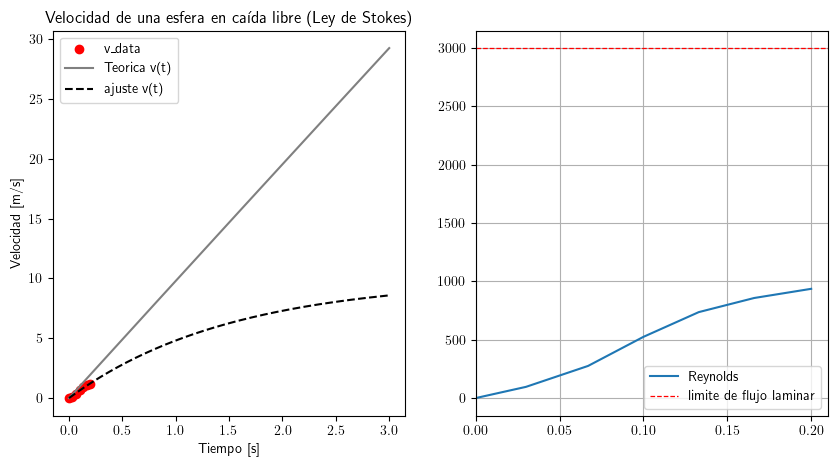

In [7]:
# -----------------------------
# Parámetros conocidos
# -----------------------------
# Ejemplo
R = 0.04  # radio de la esfera (cm)
rho_s = 44.9/((4/3)*np.pi*R**2) # densidad de la esfera (g/cm^3) (Plomo = 11.35)
rho_f = 1      # densidad del fluido (1gr/cm^3) (agua = 1) (aceite = 0.88)
eta = 0.01     # viscosidad dinámica del fluido (Pa.s= Ns/cm^2=(gr*cm/s)/cm*2 = gr/s*cm)
g = 981        # aceleración gravitacional (cm/s^2)

# Tiempo característico
tau = 2 * R**2 * rho_s / (9 * eta)

# Velocidad terminal
v_t = 2 * R**2 * g * (rho_s - rho_f) / (9 * eta)

# \eta Viscosidad
print('rho_s=',rho_s, 'vt_data (m/s)=',v_t/100,'tau_data(s) = ', tau, 'Viscosidad (gr/cm s) =',  2 * R**2 * rho_s/(9*tau))
# -----------------------------

# Definir función v(t)
# -----------------------------
def v(t, vt, tau):
    return vt * (1 - np.exp(-t/tau))

popt, pcov = curve_fit(v, t_data, v_data, p0=[v_t, tau])
vt_fit, tau_fit = popt

print(f"Parámetros ajustados: vt_fit(m/s) = {vt_fit/100:.4f} m/s, tau_fit(s) = {tau_fit:.4f} s", 'Viscosidad_fit= ',  2 * R**2 * rho_s/(9*tau_fit))

# -----------------------------
# Graficar resultados
# -----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=False)

t_fine = np.linspace(0, 3, 500)

ax1.scatter(t_data, v_data/100, label='v_data', color='red')
ax1.plot(t_fine, v(t_fine, v_t, tau)/100, label='Teorica v(t)', color='grey')
ax1.plot(t_fine, v(t_fine, *popt)/100, label='ajuste v(t)', color='black', linestyle='--')

ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('Velocidad [m/s]')
ax1.set_title('Velocidad de una esfera en caída libre (Ley de Stokes)')
ax1.legend()

ax2.plot(t_data, reynolds_number(rho_f, v_data, R, eta ), label ='Reynolds')
ax2.axhline(y=3000, color='red', linestyle='--', linewidth=0.9, label=r'limite de flujo laminar')
ax2.set_xlim(0,0.21)
ax2.legend()

plt.grid(True)
plt.show()